# Data Cleaning 
- Addressing **missing values, outliers, and inconsistencies**.
- This step ensures the data's quality before analysis. 
- Understand the **structure** and **quality** of the data through exploration and prepare it for further analysis. **Exploratory Data Analysis (EDA)** 

## 1.Forest Cover
- Annual Tree Cover Loss
- Treecover Loss
- Tree cover Extent


In [165]:
# importations
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns   
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier  
from sklearn.linear_model import LogisticRegression
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import  ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
import warnings
warnings.filterwarnings('ignore')


In [166]:
# common functions

def readCSV(file_path):
    df = pd.read_csv(file_path)
    return df

def readXLS(file_path):
    df = pd.read_excel(file_path)
    return df

def describeData(df): 
    print("--------------------")
    print(" OVERVIEW OF DATA ")
    print("--------------------")
    print(df.head())
    print("--------------------")
    print(" DATA TYPES ")
    print("--------------------")
    print(df.dtypes)
    print("--------------------")
    print(" DATAFRAME SHAPE ")
    print("--------------------")
    print(df.shape)

def summaryOfData(df):
    print("Statistical Summary of data")
    print(df.describe())

#  Checking for Outliers and Null Values
    
def  checkNullValues(df):
    print("Null Values Present in Data")
    print(df.isna().sum() * 100 / len(df))


# checking for outliers based on box plot and Inter Quartile Range

def checkOutliersIQR(df):
    Q1 = np.percentile(df, 25, method='midpoint')
    Q3 = np.percentile(df, 75, method='midpoint')
    IQR = Q3 - Q1
    print(f"Inter Quartile Range: {IQR}")

    # Calculating Lower & Upper Bounds
    lowerBound = Q1 - 1.5*IQR
    upperBound = Q3 + 1.5*IQR 

    print(f"Lower Bound: {lowerBound}")
    print(f"Upper Bound: {upperBound}")


def checkOutliersBoxplot(df):
    sns.boxplot(df)

### Read Data (Forest Cover)

**NOTE**: Forest Cover
- **Tree cover** is defined as all vegetation taller than 5 meters in height as of 2000. The tree cover data set is a collaboration of the University of Maryland, Google, USGS, and NASA, and uses Landsat satellite images to map tree cover globally for the years 2000 and 2010 at 30-meter resolution. 
- Note that *“tree cover”* is the biophysical presence of trees and may take the form of natural forests or plantations existing over a range of canopy densities.

#### Focuses on the Annual Tree cover loss by dominant driver in Kenya

In [167]:
forest_cover_loss = readCSV("data/Forest Cover/Annual tree cover loss by dominant driver in Kenya/treecover_loss__ha.csv") 
forest_cover_extent = readCSV("data/Forest Cover/Annual tree cover loss by dominant driver in Kenya/treecover_extent_2000__ha.csv")

### Overview of into the data

- Overview of Data using df.head()
- Checking Data types
- Checking the dimension of the data

In [168]:
summaryOfData(forest_cover_loss)

Statistical Summary of data
       umd_tree_cover_loss__year  umd_tree_cover_loss__ha  \
count                 132.000000               132.000000   
mean                 2011.500000              2841.117428   
std                     6.368458              6032.652721   
min                  2001.000000                25.579869   
25%                  2006.000000               126.041695   
50%                  2011.500000               245.179269   
75%                  2017.000000               492.886238   
max                  2022.000000             24213.043111   

       gfw_gross_emissions_co2e_all_gases__Mg  
count                            1.320000e+02  
mean                             1.395906e+06  
std                              2.989859e+06  
min                              6.880135e+03  
25%                              5.074765e+04  
50%                              1.005047e+05  
75%                              2.871572e+05  
max                              1.211

In [169]:
describeData(forest_cover_extent)

--------------------
 OVERVIEW OF DATA 
--------------------
   iso  umd_tree_cover_extent_2000__ha      area__ha
0  KEN                    3.319483e+06  5.859834e+07
--------------------
 DATA TYPES 
--------------------
iso                                object
umd_tree_cover_extent_2000__ha    float64
area__ha                          float64
dtype: object
--------------------
 DATAFRAME SHAPE 
--------------------
(1, 3)


### Statistical Summary of the Forest Cover Data

In [170]:
describeData(forest_cover_loss)

--------------------
 OVERVIEW OF DATA 
--------------------
  tsc_tree_cover_loss_drivers__driver  umd_tree_cover_loss__year  \
0                             Unknown                       2012   
1                            Forestry                       2021   
2                Shifting agriculture                       2019   
3                            Forestry                       2020   
4                             Unknown                       2019   

   umd_tree_cover_loss__ha  gfw_gross_emissions_co2e_all_gases__Mg  
0               270.305210                            8.048608e+04  
1               103.917887                            9.014521e+04  
2             14614.369913                            6.670329e+06  
3               490.616006                            2.383159e+05  
4               114.893385                            4.442652e+04  
--------------------
 DATA TYPES 
--------------------
tsc_tree_cover_loss_drivers__driver        object
umd_tree_co

In [171]:
summaryOfData(forest_cover_extent)

Statistical Summary of data
       umd_tree_cover_extent_2000__ha      area__ha
count                    1.000000e+00  1.000000e+00
mean                     3.319483e+06  5.859834e+07
std                               NaN           NaN
min                      3.319483e+06  5.859834e+07
25%                      3.319483e+06  5.859834e+07
50%                      3.319483e+06  5.859834e+07
75%                      3.319483e+06  5.859834e+07
max                      3.319483e+06  5.859834e+07


### Check For Null Values and Outliers

In [172]:
# checking missing values 
checkNullValues(forest_cover_loss) 

Null Values Present in Data
tsc_tree_cover_loss_drivers__driver       0.0
umd_tree_cover_loss__year                 0.0
umd_tree_cover_loss__ha                   0.0
gfw_gross_emissions_co2e_all_gases__Mg    0.0
dtype: float64


In [173]:
# checking missing values 
checkNullValues(forest_cover_extent)  

Null Values Present in Data
iso                               0.0
umd_tree_cover_extent_2000__ha    0.0
area__ha                          0.0
dtype: float64


### Checking for Outliers using IQR (Inter Quartile Range) and Box Plots for visualization

**Formulaes**
IQR = Quartile3 – Quartile1
upperBound = Q3 + 1.5*IQR
lowerBound = Q1 – 1.5*IQR


In [174]:
# Checking for Outliers using IQR (Inter Quartile Range) 
checkOutliersIQR(forest_cover_loss['umd_tree_cover_loss__ha'])  

Inter Quartile Range: 370.0310606437092
Lower Bound: -429.92118090567
Upper Bound: 1050.2030616691668


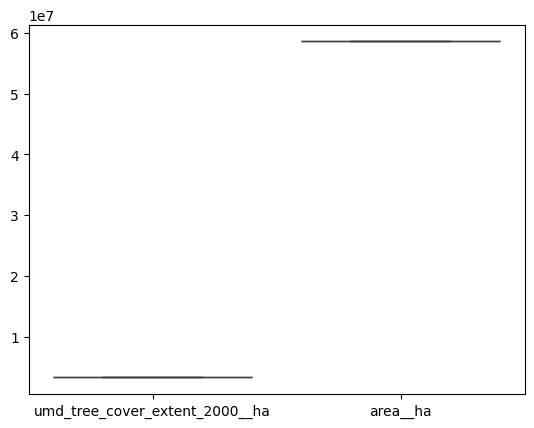

In [175]:
# Checking for Outliers Using BoxPlot 
checkOutliersBoxplot(forest_cover_extent)

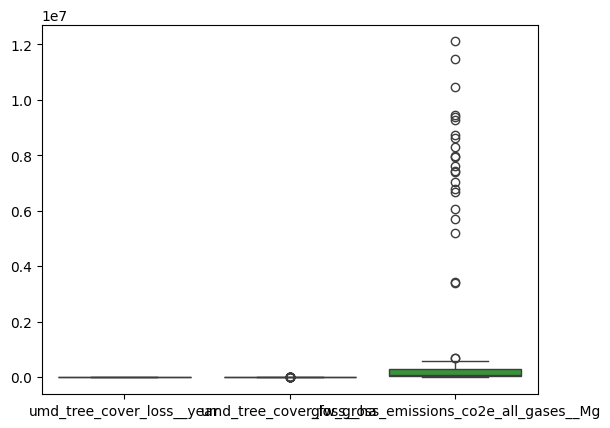

In [176]:
# Checking for Outliers using Box Plots 
checkOutliersBoxplot(forest_cover_loss)

**Note:** 
- Good News, The data lacks missing values
- However, we find that there exists outliers based on the tree cover loss but based on context of the data there exists a chance of the outliers being true values as opposed to outlier values.

#### Focuses on the Locations of tree cover loss in Kenya
- Kindly note we will merge the adm1_metadata.csv with the treecover_extent_2000_by_region_ha.csv due to the locations

In [177]:
# contains Kenya County based details
adm1_metadata = readCSV("data/Forest Cover/Location of tree cover loss in Kenya/adm1_metadata.csv")
# contains Forest cover extent and loss per region
forest_cover_extent_by_region = readCSV("data/Forest Cover/Location of tree cover loss in Kenya/treecover_extent_2000_by_region__ha.csv")
forest_cover_loss_by_region =readCSV("data/Forest Cover/Location of tree cover loss in Kenya/treecover_loss_by_region__ha.csv")


In [178]:
# Merge DataFrames
forest_cover_extent_by_region_merged = pd.merge(forest_cover_extent_by_region, adm1_metadata, left_on='adm1', right_on='adm1__id', how='inner')

# Drop unnecessary columns
unnecessary_columns = ['adm1', 'adm1__id', 'iso']
forest_cover_extent_by_region_merged = forest_cover_extent_by_region_merged.drop(columns=unnecessary_columns)

# Reset index without inplace
forest_cover_extent_by_region_merged.reset_index(drop=True, inplace=True)

In [179]:
# Viewing the Data
forest_cover_extent_by_region_merged.head()

,umd_tree_cover_extent_2000__ha,area__ha,name
0,113989.000894,1.084248e+06,Baringo
1,120633.520455,2.378441e+05,Bomet
2,71112.041454,3.573152e+05,Bungoma
3,22038.531962,1.799546e+05,Busia
4,107098.334326,2.804070e+05,Elgeyo-Marakwet


#### Focuses on the Primary Forest Loss in Kenya
- Focuses wholly on the tree cover loss per year 

In [180]:
primary_forests_2001_tropics_only = readCSV("data/Forest Cover/Primary Forest loss in Kenya/treecover_extent_2000_in_primary_forests_2001_tropics_only__ha.csv")
primary_forest_cover_loss_2001_tropics_only = readCSV("data/Forest Cover/Primary Forest loss in Kenya/treecover_extent_2000_in_primary_forests_2001_tropics_only__ha.csv")
primary_forest_cover_loss_ha = readCSV("data/Forest Cover/Primary Forest loss in Kenya/treecover_loss__ha.csv")

In [181]:
summaryOfData(primary_forests_2001_tropics_only)

Statistical Summary of data
       umd_tree_cover_extent_2000__ha       area__ha
count                        1.000000       1.000000
mean                    649579.402794  650650.989627
std                               NaN            NaN
min                     649579.402794  650650.989627
25%                     649579.402794  650650.989627
50%                     649579.402794  650650.989627
75%                     649579.402794  650650.989627
max                     649579.402794  650650.989627


In [182]:
summaryOfData(primary_forest_cover_loss_2001_tropics_only)

Statistical Summary of data
       umd_tree_cover_extent_2000__ha       area__ha
count                        1.000000       1.000000
mean                    649579.402794  650650.989627
std                               NaN            NaN
min                     649579.402794  650650.989627
25%                     649579.402794  650650.989627
50%                     649579.402794  650650.989627
75%                     649579.402794  650650.989627
max                     649579.402794  650650.989627


In [183]:
summaryOfData(primary_forest_cover_loss_ha)

Statistical Summary of data
       umd_tree_cover_loss__year  umd_tree_cover_loss__ha  \
count                  22.000000                22.000000   
mean                 2011.500000             17046.704571   
std                     6.493587              4524.888037   
min                  2001.000000              6639.031072   
25%                  2006.250000             15421.504702   
50%                  2011.500000             17497.941677   
75%                  2016.750000             19180.233260   
max                  2022.000000             26102.960081   

       gfw_gross_emissions_co2e_all_gases__Mg  
count                            2.200000e+01  
mean                             8.375434e+06  
std                              2.381587e+06  
min                              3.695346e+06  
25%                              7.306174e+06  
50%                              8.438305e+06  
75%                              9.715285e+06  
max                              1.296

## 2. GHG Emissions
- County Groupings
- Annual Emissions (1830-2021)
- Emissions Cumulative CO2e (1851-2021)
- GMST_respoonse 

### About Data
**EMISSIONS_ANNUAL_1830-2021.csv**: Data includes **annual emissions of CO2** (Pg CO2 year-1), CH4 (Tg CH4 year-1) and N2O (Tg N2O year-1) during 1830-2021. The Data column provides values for every combination of the categorical variables. 

**EMISSIONS_CUMULATIVE_CO2e100_1851-2021.csv**: Data includes the **cumulative CO2 equivalent emissions** in units Pg CO2-e100 during 1851-2021. The Data column provides values for every combination of the categorical variables. 

**GMST_response_1851-2021.csv**: Data includes the change in **global mean surface temperature** (GMST) due to emissions of the three gases during 1851-2021 in units °C. The Data column provides values for every combination of the categorical variables. 


In [184]:
# country_groupings = readXLS("data/GHG Emissions/COUNTRY_GROUPINGS.xlsx") # No need to read this as it contains the country codes
annual_emissions = readCSV("data/GHG Emissions/EMISSIONS_ANNUAL_1830-2021.csv")
cumulative_emissions = readCSV("data/GHG Emissions/EMISSIONS_CUMULATIVE_CO2e100_1851-2021.csv")
global_mean_surface_temperature_reponse = readCSV("data/GHG Emissions/GMST_response_1851-2021.csv")

### Overview of into the data
- Overview of Data using df.head()
- Checking Data types
- Checking the dimension of the data

#### Annual Emissions Summary & Describe

In [185]:
summaryOfData(annual_emissions)

Statistical Summary of data
                Year           Data
count  369048.000000  368280.000000
mean     1926.478734       0.733928
std        54.967060       6.863213
min      1830.000000      -0.401257
25%      1879.000000       0.000124
50%      1927.000000       0.003339
75%      1974.000000       0.043417
max      2021.000000     364.929660


In [186]:
describeData(annual_emissions)

--------------------
 OVERVIEW OF DATA 
--------------------
     CNTR_NAME ISO3    Gas Component  Year      Data              Unit
0  Afghanistan  AFG  CH[4]    Fossil  1830  0.018746  Tg~CH[4]~year^-1
1  Afghanistan  AFG  CH[4]    Fossil  1831  0.018850  Tg~CH[4]~year^-1
2  Afghanistan  AFG  CH[4]    Fossil  1832  0.018953  Tg~CH[4]~year^-1
3  Afghanistan  AFG  CH[4]    Fossil  1833  0.019057  Tg~CH[4]~year^-1
4  Afghanistan  AFG  CH[4]    Fossil  1834  0.019161  Tg~CH[4]~year^-1
--------------------
 DATA TYPES 
--------------------
CNTR_NAME     object
ISO3          object
Gas           object
Component     object
Year           int64
Data         float64
Unit          object
dtype: object
--------------------
 DATAFRAME SHAPE 
--------------------
(369048, 7)


#### Cumulative Emissions Summary & Describe

In [187]:
summaryOfData(cumulative_emissions)

Statistical Summary of data
                Year           Data
count  450585.000000  450585.000000
mean     1936.000000       7.251899
std        49.362659      62.541571
min      1851.000000      -2.800884
25%      1893.000000       0.001642
50%      1936.000000       0.040730
75%      1979.000000       0.529036
max      2021.000000    3576.508126


In [188]:
describeData(cumulative_emissions)

--------------------
 OVERVIEW OF DATA 
--------------------
     CNTR_NAME ISO3    Gas Component  Year      Data              Unit
0  Afghanistan  AFG  3-GHG    Fossil  1851  0.000455  Pg~CO[2]*-e[100]
1  Afghanistan  AFG  3-GHG    Fossil  1852  0.000913  Pg~CO[2]*-e[100]
2  Afghanistan  AFG  3-GHG    Fossil  1853  0.001375  Pg~CO[2]*-e[100]
3  Afghanistan  AFG  3-GHG    Fossil  1854  0.001841  Pg~CO[2]*-e[100]
4  Afghanistan  AFG  3-GHG    Fossil  1855  0.002311  Pg~CO[2]*-e[100]
--------------------
 DATA TYPES 
--------------------
CNTR_NAME     object
ISO3          object
Gas           object
Component     object
Year           int64
Data         float64
Unit          object
dtype: object
--------------------
 DATAFRAME SHAPE 
--------------------
(450585, 7)


#### Global Mean Surface Temperature Response Summary & Describe

In [189]:
summaryOfData(global_mean_surface_temperature_reponse)

Statistical Summary of data
                Year          Data
count  450585.000000  4.505850e+05
mean     1936.000000  3.265729e-03
std        49.362659  2.816419e-02
min      1851.000000 -1.261315e-03
25%      1893.000000  7.393887e-07
50%      1936.000000  1.834198e-05
75%      1979.000000  2.382394e-04
max      2021.000000  1.610600e+00


In [190]:
describeData(global_mean_surface_temperature_reponse)

--------------------
 OVERVIEW OF DATA 
--------------------
     CNTR_NAME ISO3    Gas Component  Year          Data Unit
0  Afghanistan  AFG  3-GHG    Fossil  1851  2.047658e-07   °C
1  Afghanistan  AFG  3-GHG    Fossil  1852  4.112079e-07   °C
2  Afghanistan  AFG  3-GHG    Fossil  1853  6.193339e-07   °C
3  Afghanistan  AFG  3-GHG    Fossil  1854  8.291519e-07   °C
4  Afghanistan  AFG  3-GHG    Fossil  1855  1.040669e-06   °C
--------------------
 DATA TYPES 
--------------------
CNTR_NAME     object
ISO3          object
Gas           object
Component     object
Year           int64
Data         float64
Unit          object
dtype: object
--------------------
 DATAFRAME SHAPE 
--------------------
(450585, 7)


### Check forr Null and Outliers
- Check Summary of the data in terms of null values
- Checking for Outliers using IQR (Inter Quartile Range) and Box Plots for visualization
    - **Formulaes**
    - IQR = Quartile3 – Quartile1
    - upperBound = Q3 + 1.5*IQR
    - lowerBound = Q1 – 1.5*IQR

In [191]:
# checking missing values 
checkNullValues(annual_emissions)  

Null Values Present in Data
CNTR_NAME    0.000000
ISO3         0.000000
Gas          0.000000
Component    0.000000
Year         0.000000
Data         0.208103
Unit         0.000000
dtype: float64


In [192]:
# checking missing values  
checkNullValues(cumulative_emissions)  

Null Values Present in Data
CNTR_NAME    0.0
ISO3         0.0
Gas          0.0
Component    0.0
Year         0.0
Data         0.0
Unit         0.0
dtype: float64


In [193]:
# checking missing values  
checkNullValues(global_mean_surface_temperature_reponse)  

Null Values Present in Data
CNTR_NAME    0.0
ISO3         0.0
Gas          0.0
Component    0.0
Year         0.0
Data         0.0
Unit         0.0
dtype: float64


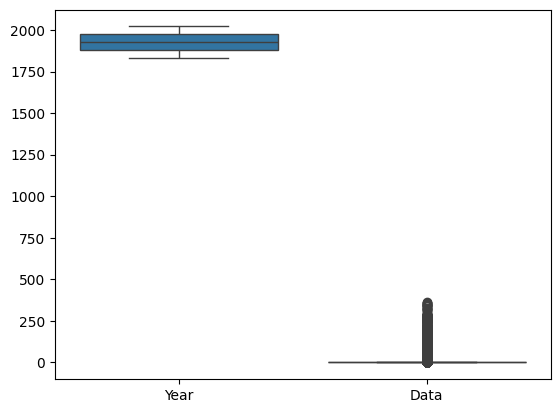

In [194]:
# Checking for Outliers using Box Plots 
checkOutliersBoxplot(annual_emissions)

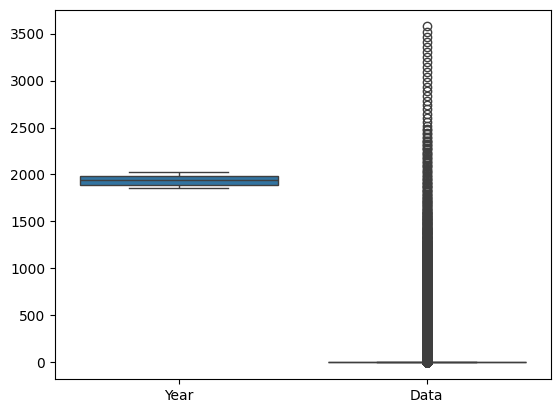

In [195]:
# Checking for Outliers using Box Plots 
checkOutliersBoxplot(cumulative_emissions)

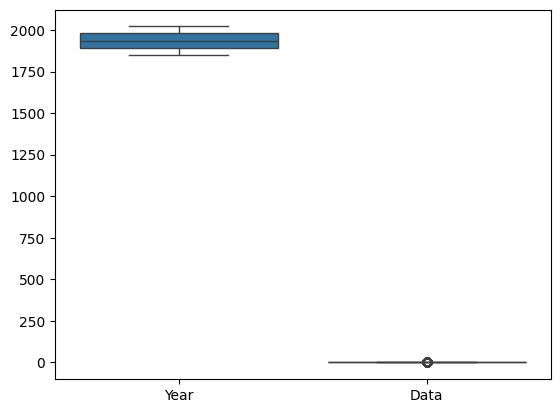

In [196]:
# Checking for Outliers using Box Plots 
checkOutliersBoxplot(global_mean_surface_temperature_reponse)

# Visualizations

- Forest Cover Loss in Kenya
- GHG Emissions in Kenya


# Prediction & Modeling 
- Predict the next probable driver of deforestration
- Predict emissions based on cummulative GHG data (we use cummulative as it focuses on Long term)
- Predict global mean surfrace temperature (GMST)


### 1. Predict the next probable driver of deforestration
Target Algorithms: 
- Decision Trees
- Random Forest 
- Logistic Regression

Target Data: Annual TreeCover Loss by dominant drive
Type of Data: Categorical

In [197]:
forest_cover_loss.reset_index(drop=True, inplace=True)

In [198]:
forest_cover_loss

,tsc_tree_cover_loss_drivers__driver,umd_tree_cover_loss__year,umd_tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg
0,Unknown,2012,270.305210,8.048608e+04
1,Forestry,2021,103.917887,9.014521e+04
2,Shifting agriculture,2019,14614.369913,6.670329e+06
3,Forestry,2020,490.616006,2.383159e+05
4,Unknown,2019,114.893385,4.442652e+04
...,...,...,...,...
127,Unknown,2004,129.422287,3.506442e+04
128,Shifting agriculture,2017,20414.895399,1.147155e+07
129,Wildfire,2008,27.562667,1.131171e+04
130,Wildfire,2018,65.680043,2.640220e+04


### Prepraring Data For Modelling

In [199]:
category_mapping = {'Unknown': 0, 'Forestry':1, 'Shifting agriculture':2,'Wildfire':3, 'Commodity driven deforestation':4,'Urbanization':5,}

forest_cover_loss['tsc_tree_cover_loss_drivers__driver'] = forest_cover_loss['tsc_tree_cover_loss_drivers__driver'].map(category_mapping)

forest_cover_loss

,tsc_tree_cover_loss_drivers__driver,umd_tree_cover_loss__year,umd_tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg
0,0,2012,270.305210,8.048608e+04
1,1,2021,103.917887,9.014521e+04
2,2,2019,14614.369913,6.670329e+06
3,1,2020,490.616006,2.383159e+05
4,0,2019,114.893385,4.442652e+04
...,...,...,...,...
127,0,2004,129.422287,3.506442e+04
128,2,2017,20414.895399,1.147155e+07
129,3,2008,27.562667,1.131171e+04
130,3,2018,65.680043,2.640220e+04


In [200]:
# Train the decision tree model
# decision_tree.fit(X_train, y_train) 
# Modeling using Decision Trees
X = forest_cover_loss.drop(["tsc_tree_cover_loss_drivers__driver"],axis=1)
y = forest_cover_loss["tsc_tree_cover_loss_drivers__driver"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Using Decision Trees

In [201]:
# Create a decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=0)

# fit model to training data
decision_tree.fit(X_train,y_train)

# make predictions of test set
y_pred = decision_tree.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
print(f'accuracy: {accuracy:.2f}')
print(f'Classification Report: \n {classification_report_result}')

accuracy: 0.67
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.67      0.50      0.57         4
           2       1.00      1.00      1.00         7
           3       0.67      1.00      0.80         2
           4       0.60      0.75      0.67         4
           5       0.17      0.25      0.20         4

    accuracy                           0.67        27
   macro avg       0.68      0.67      0.65        27
weighted avg       0.74      0.67      0.68        27



### Using Random Forest 

In [202]:
# Instantiate the Model by creating a Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Model
random_forest_classifier.fit(X_train, y_train)

# Make Predictions
y_pred = random_forest_classifier.predict(X_test)

# Evaluation Matrix
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.5555555555555556


### Using Logistic Regression

In [203]:
# Instantiate the Model
logistics_regression = LogisticRegression()

# 3. Train the Model
# Train the logistic regression model
logistics_regression.fit(X_train, y_train)

# 4. Make Predictions
# Make predictions on the testing data
y_pred = logistics_regression.predict(X_test)

# 5. Evaluate the Model
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5555555555555556


### 2. Predict emissions based on cummulative GHG data (we use cummulative as it focuses on Long term)
- Using Time Series 
- Stationarity Check

In [204]:
# cumulative_emissions['Year'] = pd.to_datetime(cumulative_emissions['Year'])

cumulative_emissions.set_index('Year',inplace=True)
cumulative_emissions

,CNTR_NAME,ISO3,Gas,Component,Data,Unit
Year,,,,,,
1851,Afghanistan,AFG,3-GHG,Fossil,0.000455,Pg~CO[2]*-e[100]
1852,Afghanistan,AFG,3-GHG,Fossil,0.000913,Pg~CO[2]*-e[100]
1853,Afghanistan,AFG,3-GHG,Fossil,0.001375,Pg~CO[2]*-e[100]
1854,Afghanistan,AFG,3-GHG,Fossil,0.001841,Pg~CO[2]*-e[100]
1855,Afghanistan,AFG,3-GHG,Fossil,0.002311,Pg~CO[2]*-e[100]
...,...,...,...,...,...,...
2017,Zimbabwe,ZWE,N[2]*O,Total,0.356874,Pg~CO[2]*-e[100]
2018,Zimbabwe,ZWE,N[2]*O,Total,0.362102,Pg~CO[2]*-e[100]
2019,Zimbabwe,ZWE,N[2]*O,Total,0.367381,Pg~CO[2]*-e[100]


In [205]:
cumulative_emissions = cumulative_emissions[cumulative_emissions['CNTR_NAME'] == 'Kenya']
cumulative_emissions

,CNTR_NAME,ISO3,Gas,Component,Data,Unit
Year,,,,,,
1851,Kenya,KEN,3-GHG,Fossil,0.000232,Pg~CO[2]*-e[100]
1852,Kenya,KEN,3-GHG,Fossil,0.000467,Pg~CO[2]*-e[100]
1853,Kenya,KEN,3-GHG,Fossil,0.000707,Pg~CO[2]*-e[100]
1854,Kenya,KEN,3-GHG,Fossil,0.000951,Pg~CO[2]*-e[100]
1855,Kenya,KEN,3-GHG,Fossil,0.001199,Pg~CO[2]*-e[100]
...,...,...,...,...,...,...
2017,Kenya,KEN,N[2]*O,Total,0.686932,Pg~CO[2]*-e[100]
2018,Kenya,KEN,N[2]*O,Total,0.703466,Pg~CO[2]*-e[100]
2019,Kenya,KEN,N[2]*O,Total,0.722371,Pg~CO[2]*-e[100]


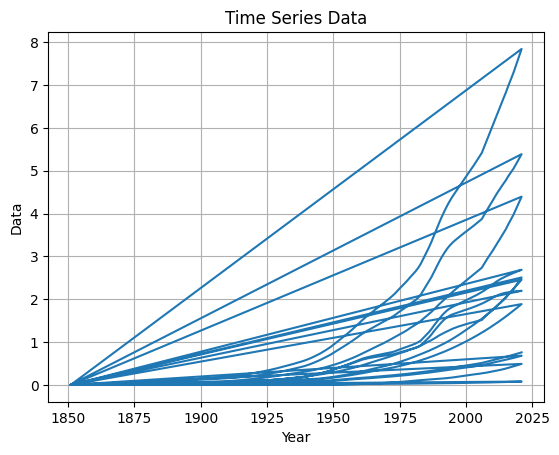

In [206]:
# Visual Inspection
# Plot the time series graph 
plt.plot(cumulative_emissions.index, cumulative_emissions['Data'])
plt.title('Time Series Data')
plt.xlabel('Year')
plt.ylabel('Data')
plt.grid(True)
plt.show()

In [207]:
# ADF Test
# Perform ADF test
adf_result = adfuller(cumulative_emissions['Data'])

In [208]:

# Extract ADF test statistics and p-value
adf_statistic = adf_result[0]
p_value = adf_result[1]

# Print ADF test statistics and p-value
print('ADF Statistic:', adf_statistic)
print('p-value:', p_value)

# Interpret the results
if p_value < 0.05:
    print('Reject the null hypothesis (H0): The data is stationary.')
else:
    print('Fail to reject the null hypothesis (H0): The data is non-stationary.')

ADF Statistic: -5.7395360926409245
p-value: 6.322569303823096e-07
Reject the null hypothesis (H0): The data is stationary.


TypeError: float() argument must be a string or a real number, not 'Figure'

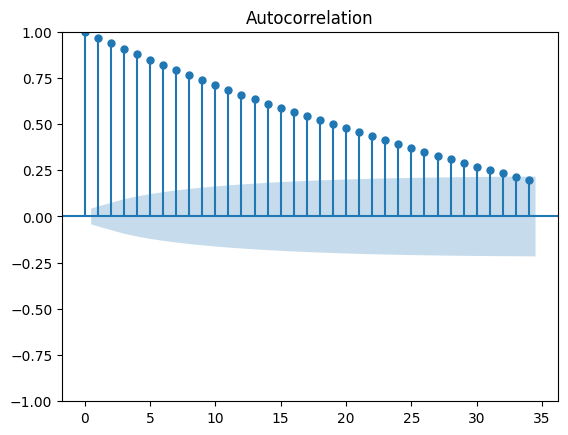

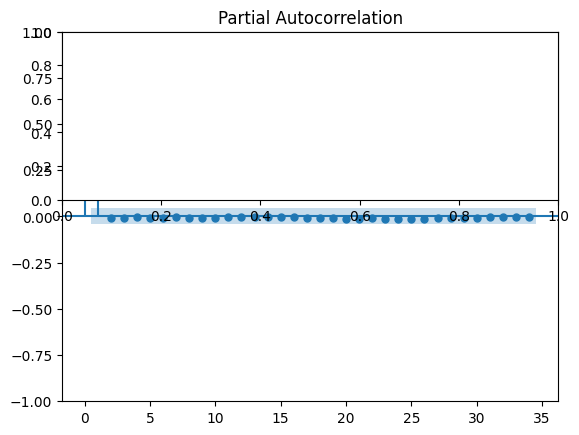

In [209]:
# Plot ACF and PACF
acf_plot = plot_acf(cumulative_emissions['Data'])
pacf_plot = plot_pacf(cumulative_emissions['Data'])
plt.subplot(211)
plt.plot(acf_plot)
plt.axhline(y=0, linestyle="--", color="gray")
plt.title("Autocorrelation Function (ACF)")
plt.subplot(212)
plt.plot(pacf_plot)
plt.axhline(y=0, linestyle="--", color="gray")
plt.title("Partial Autocorrelation Function (PACF)")
plt.tight_layout()
plt.show()

### Fitting the Model

In [210]:
best_aic = float("inf")
best_model = None
for p in range(1, 5):
    for q in range(1, 5):
        model = ARIMA(cumulative_emissions['Data'], order=(p, 0, q))  # Adjust d based on stationarity test
        try:
            model_fit = model.fit()
            aic = model_fit.aic
            if aic < best_aic:
                best_aic = aic
                best_model = model_fit
        except:
            pass  # Handle potential fitting errors

                               SARIMAX Results                                
Dep. Variable:                   Data   No. Observations:                 2052
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -144.650
Date:                Wed, 31 Jan 2024   AIC                            297.301
Time:                        16:36:43   BIC                            319.807
Sample:                             0   HQIC                           305.554
                               - 2052                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5436      0.455      1.194      0.233      -0.349       1.436
ar.L1          0.9679      0.013     74.543      0.000       0.942       0.993
ma.L1          0.0057      0.207      0.028      0.9

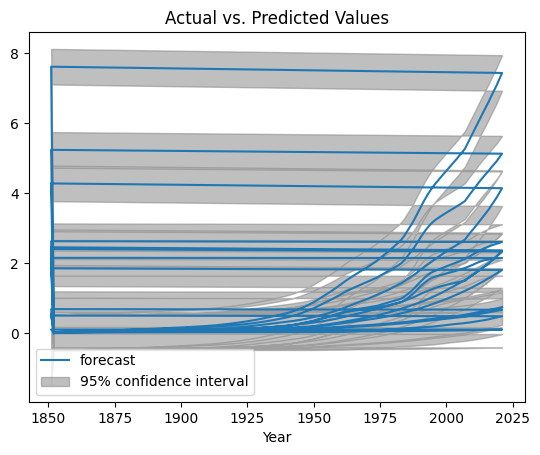

In [212]:
# Print model summary
print(best_model.summary())

# Plot actual vs. predicted values
plot_predict(best_model,dynamic=False)
plt.title("Actual vs. Predicted Values")
plt.show()

In [163]:
# Prediction
forecast = model_fit.forecast(steps=1)  # predict one step ahead
print(forecast)

2052    0.753246
dtype: float64


# Extraction